In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.metrics import accuracy_score


In [98]:
import cufflinks as cf

In [99]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [100]:
df=pd.read_csv(r'C:\Users\Najarin\Desktop\Ml-Heartdisease\heart.csv')

In [101]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [102]:
info=["age","1:male,0:female","chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asympotomatic restingbloodpressure","serum cholestoral in mg/dl","fasting blodd sugar >120 mg/dl","resting electrocardiographic results(values 0,1,2)","maximum heart rate acheived","exercise induced angina","oldpeak=ST depression indused by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels(0-3) coloured by flourosopy","thal: 3=normal;  6=fixed defect; 7=reversable defect"]
      
      
    
     
        
for i in range(len(info)):
      print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1:male,0:female
cp:			chest pain type,1:typical angina,2:atypical angina,3:non-anginal pain,4:asympotomatic restingbloodpressure
trestbps:			serum cholestoral in mg/dl
chol:			fasting blodd sugar >120 mg/dl
fbs:			resting electrocardiographic results(values 0,1,2)
restecg:			maximum heart rate acheived
thalach:			exercise induced angina
exang:			oldpeak=ST depression indused by exercise relative to rest
oldpeak:			the slope of the peak exercise ST segment
slope:			number of major vessels(0-3) coloured by flourosopy
ca:			thal: 3=normal;  6=fixed defect; 7=reversable defect


In [103]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [104]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [105]:
df.shape #for displaying no of rows and columns

(303, 14)

In [106]:
df.size # total size of data frame303*14=4242

4242

In [107]:
df.describe()#count mean max

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [108]:
df.info()# for checking null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [109]:
    #VISUALIZATION
    #fOR VISUALIZATION WE USE MATPLOTLIB LIBRARY,SEABORN

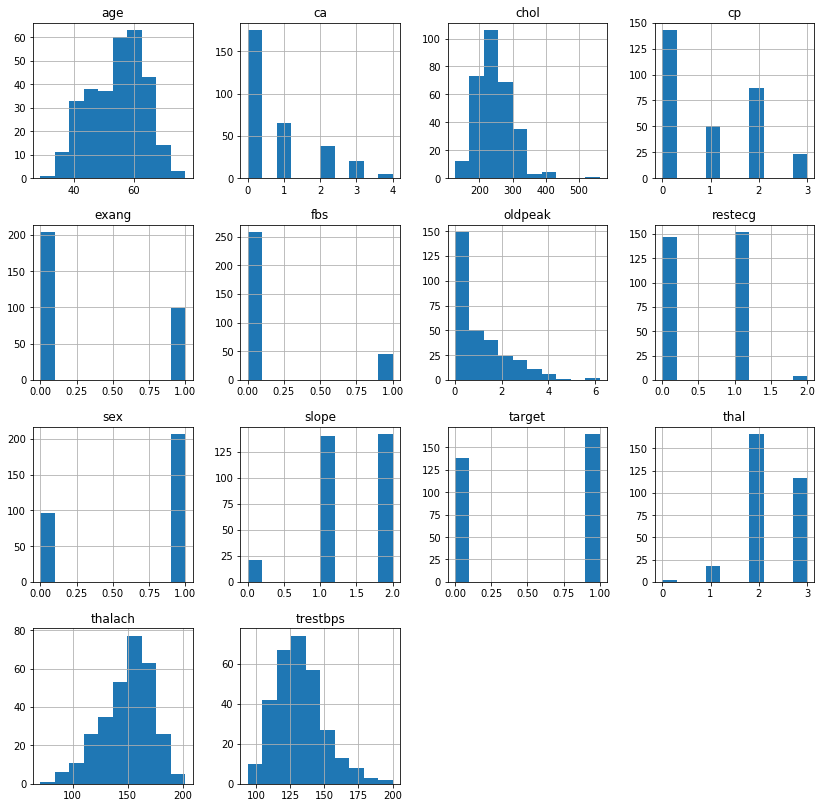

In [110]:
df.hist(figsize=(14,14))# it is from pandas and hist means histogram
plt.show()

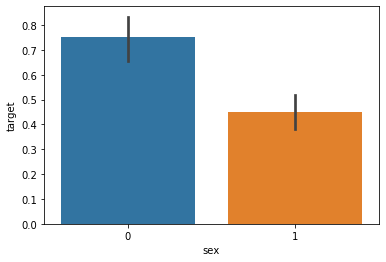

In [111]:
sns.barplot(df['sex'],df['target'])#graph using seaborn
plt.show()

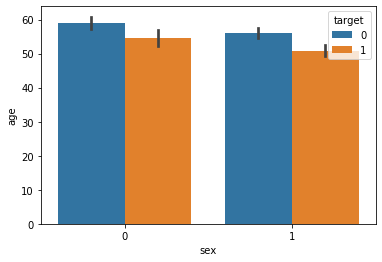

In [112]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [113]:
px.bar(df,df['sex'],df['age'])

In [114]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']#hitmap

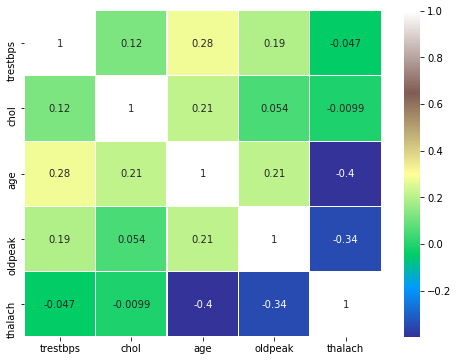

In [115]:
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

Text(0.5, 1.0, 'Max heart rate of patients with  heart disease')

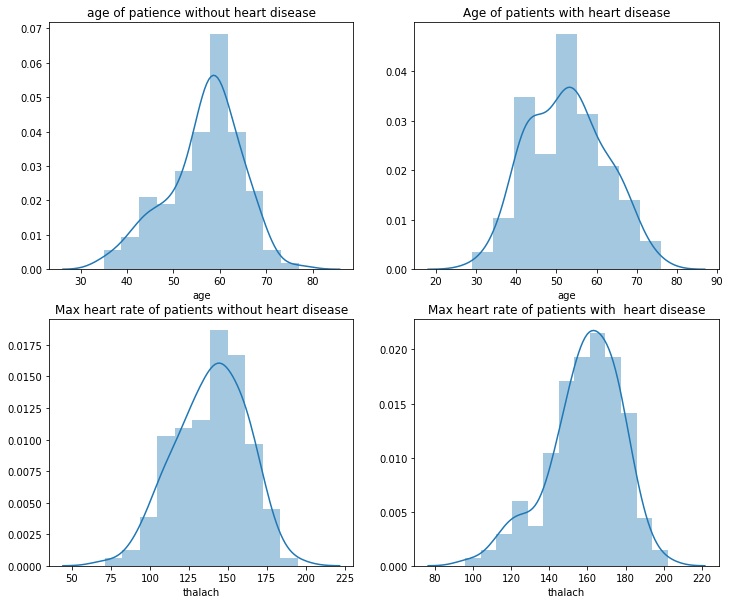

In [116]:
#create four displots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age) 
plt.title("age of patience without heart disease")

plt.subplot(222)
sns.distplot(df[df['target']==1].age) 
plt.title("Age of patients with heart disease")

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach) 
plt.title("Max heart rate of patients without heart disease")

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach) 
plt.title("Max heart rate of patients with  heart disease")

In [117]:
#Data preprocessing

In [118]:
 X,y=df.loc[:,:'thal'],df['target']#loc method is used to call columns

In [119]:
X# contains all data upto thalach

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [120]:
y #contains only  target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [121]:
df.shape

(303, 14)

In [122]:
X.shape

(303, 13)

In [123]:
X.size

3939

In [124]:
#converting to standard
#from sklearn.preprocessing import StandardScaler
#std=StandardScaler().fit(X)
#X_std=std.transform(X)

In [125]:
X#splitting

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [126]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [127]:
X.shape

(303, 13)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)#70% training 30%testing

In [130]:
X_train.shape

(212, 13)

In [131]:
X_train.size

2756

In [132]:
X_test.size

1183

In [133]:
X_test.shape

(91, 13)

In [134]:
y_train.size

212

In [135]:
y_test.size

91

In [136]:
#DECISION TREEE CLASSIFIER

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()#max depth=7
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [139]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [140]:
prediction=dt.predict(X_test)

In [141]:
prediction

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [142]:
accuracy_dt=accuracy_score(y_test,prediction)*100#comparing predicted data and actual data

In [143]:
accuracy_dt

76.92307692307693

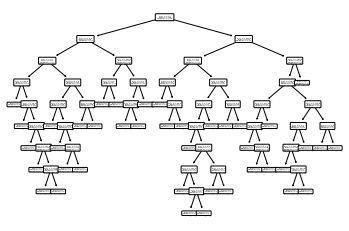

In [144]:
#visualization of decision tree
from sklearn import tree
tree.plot_tree(dt,#filled=True, 
        rounded=True, 
              fontsize=2);

In [145]:
dt.feature_importances_

array([0.05905285, 0.0283698 , 0.32392476, 0.07195982, 0.07033834,
       0.        , 0.        , 0.09431557, 0.04724994, 0.09740448,
       0.08941015, 0.10975468, 0.0082196 ])

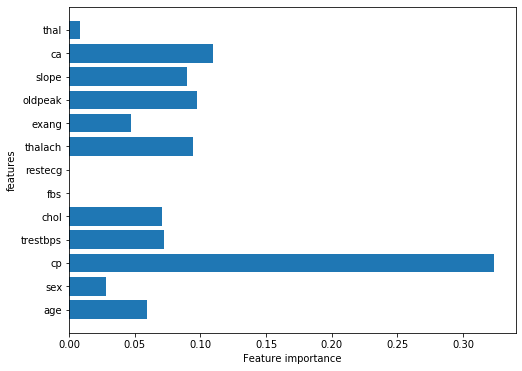

In [146]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_fetures=13
    plt.barh(range(n_fetures),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_fetures),X)
    plt.xlabel("Feature importance")
    plt.ylabel("features")
    plt.ylim(-1,n_fetures)
plot_feature_importance(dt)

In [147]:
custom_data=np.array([[22,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [148]:
custom_data_prediction_dt=dt.predict(custom_data)

In [149]:
custom_data_prediction_dt

array([0], dtype=int64)

In [150]:
Category=['No you dont have heart disease','Yes you have heart disese']

In [151]:
print(Category[int(custom_data_prediction_dt)])

No you dont have heart disease


In [152]:
                #KNN Algorithm

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [154]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [155]:
pridiction_knn=knn.predict(X_test)

In [156]:
accuracy_knn=accuracy_score(y_test,pridiction_knn)*100

In [157]:
accuracy_knn

64.83516483516483

In [158]:
#predicting on custom data

In [159]:
custom_data_knn=np.array([[22,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [160]:
custom_data_knn

array([[ 22. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ]])

In [161]:
custom_data_prediction_knn=knn.predict(custom_data_knn)

In [162]:
custom_data_prediction_knn

array([1], dtype=int64)

In [163]:
Category=['No you dont have heart disease','Yes you have heart disese']

In [164]:
print(Category[int(custom_data_prediction_knn)])

Yes you have heart disese


In [165]:
#

In [174]:
k_range=range(1,50)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)*100
    scores_list.append(scores[k])

In [175]:
scores

{1: 63.73626373626373,
 2: 61.53846153846154,
 3: 59.34065934065934,
 4: 67.03296703296702,
 5: 63.73626373626373,
 6: 68.13186813186813,
 7: 64.83516483516483,
 8: 65.93406593406593,
 9: 61.53846153846154,
 10: 64.83516483516483,
 11: 61.53846153846154,
 12: 60.43956043956044,
 13: 58.24175824175825,
 14: 58.24175824175825,
 15: 63.73626373626373,
 16: 65.93406593406593,
 17: 61.53846153846154,
 18: 63.73626373626373,
 19: 61.53846153846154,
 20: 63.73626373626373,
 21: 64.83516483516483,
 22: 65.93406593406593,
 23: 64.83516483516483,
 24: 64.83516483516483,
 25: 61.53846153846154,
 26: 62.637362637362635,
 27: 57.14285714285714,
 28: 57.14285714285714,
 29: 58.24175824175825,
 30: 61.53846153846154,
 31: 58.24175824175825,
 32: 59.34065934065934,
 33: 57.14285714285714,
 34: 58.24175824175825,
 35: 56.043956043956044,
 36: 57.14285714285714,
 37: 57.14285714285714,
 38: 54.94505494505495,
 39: 57.14285714285714,
 40: 57.14285714285714,
 41: 54.94505494505495,
 42: 58.24175824175825,

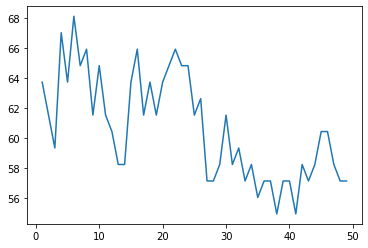

In [177]:
plt.plot(k_range,scores_list)

In [169]:
#using plotly for better understand

In [178]:
px.line(x=k_range,y=scores_list)

In [171]:
# checking which algorithm is best 1.decision treee 2.Knn

In [172]:
algorithms=['Decision tree','Knn']
scores=[accuracy_dt,accuracy_knn]

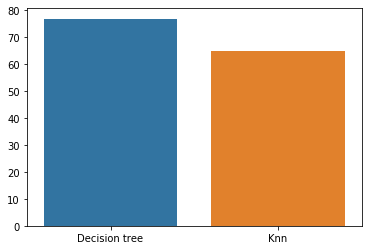

In [173]:
sns.barplot(algorithms,scores)